In [ ]:
import keras
from keras.models import Model
from keras import layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense,UpSampling2D,BatchNormalization
from keras.datasets import mnist
import numpy as np
from tensorflow.python.keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.optimizers import Adam,RMSprop


In [ ]:
# load MNIST dataset from keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# normalize data between 0 and 1
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train=train_images.reshape(train_images.shape[0],784)
# the code below takes the same specific amount of images from every class, accoriding to num_of_indices variable
# i will use them in the classifier
num_of_indices = 20
indices0 = [i for i in range(len(x_train)) if train_labels[i] == 0]
indices0=indices0[:num_of_indices]
indices1 = [i for i in range(len(x_train)) if train_labels[i] == 1]
indices1=indices1[:num_of_indices]
indices2 = [i for i in range(len(x_train)) if train_labels[i] == 2]
indices2=indices2[:num_of_indices]
indices3 = [i for i in range(len(x_train)) if train_labels[i] == 3]
indices3=indices3[:num_of_indices]
indices4 = [i for i in range(len(x_train)) if train_labels[i] == 4]
indices4=indices4[:num_of_indices]
indices5 = [i for i in range(len(x_train)) if train_labels[i] == 5]
indices5=indices5[:num_of_indices]
indices6 = [i for i in range(len(x_train)) if train_labels[i] == 6]
indices6=indices6[:num_of_indices]
indices7 = [i for i in range(len(x_train)) if train_labels[i] == 7]
indices7=indices7[:num_of_indices]
indices8 = [i for i in range(len(x_train)) if train_labels[i] == 8]
indices8=indices8[:num_of_indices]
indices9= [i for i in range(len(x_train)) if train_labels[i] == 9]
indices9=indices9[:num_of_indices]
# store every array with images from each class in one array
indices=indices0+indices1+indices2+indices3+indices4+indices5+indices6+indices7+indices8+indices9
indices.sort()
#print(indices)
# print(len(indices))
#print(x_train[87])
clas_images=x_train[[indices[:]],:]
clas_images=np.reshape(clas_images,(len(indices),784))
# auto_train is the array that stores all the other images that were not chosen to be in clas_images
# the aim is that autoencoder should not have seen the images that the classifier was trained with 
auto_train=np.delete(x_train,[indices[:]],0)
print(auto_train.shape)
print(clas_images.shape)



(59500, 784)
(500, 784)


In [ ]:
# reshape my data to the shape needed to use it as input 
auto_train=np.reshape(auto_train,(len(auto_train),28,28,1))
clas_images=np.reshape(clas_images,(len(clas_images),28,28,1))
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))
print(train_images.shape)

In [ ]:
# take the labels of the images i chose in each class
clas_labels=train_labels[indices[:]]

In [ ]:
# transorm labels to one hot encoding
clas_labels=to_categorical(clas_labels, 10)
tr_labels = to_categorical(train_labels, 10)
te_labels = to_categorical(test_labels, 10)



(60000, 28, 28, 1)


In [ ]:
# here the autoencoder is implemented, that consists of the encoder and the decoder
# the input shape is defined
input_img = keras.Input(shape=(28, 28, 1))
# initializer is defined
initializer=keras.initializers.GlorotNormal()
# the convolutional, drop out, batch normalization and max pooling layers 
conv1=layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',kernel_initializer=initializer)(input_img)
d1=layers.Dropout(0.4)(conv1)
b1=layers.BatchNormalization()(d1)
maxp1=layers.MaxPooling2D(pool_size=(2,2))(b1)

conv2=layers.Conv2D(64,kernel_size=3,activation='relu',padding='same',kernel_initializer=initializer)(maxp1)
d2=layers.Dropout(0.4)(conv2)
b2=layers.BatchNormalization()(d2)
maxp2=layers.MaxPooling2D(pool_size=(2,2))(b2)

encode=layers.Conv2D(128,kernel_size=3,activation='relu',padding='same',kernel_initializer=initializer)(maxp2) # here the images are encoded

# encode=layers.Conv2D(256,kernel_size=3,activation='relu',padding='same',kernel_initializer=initializer)(maxp3)

# the decoder starts here
conv5=layers.Conv2D(64,kernel_size=3,activation='relu',padding='same',kernel_initializer=initializer)(encode)
d5=layers.Dropout(0.4)(conv5)
b5=layers.BatchNormalization()(d5)
up5=layers.UpSampling2D((2,2))(b5)

conv6=layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',kernel_initializer=initializer)(up5)
d6=layers.Dropout(0.4)(conv6)
b6=layers.BatchNormalization()(d6)
up6=layers.UpSampling2D((2,2))(b6)

decode=Conv2D(1, kernel_size=3, activation='sigmoid', padding='same',kernel_initializer=initializer)(up6) #here the images have been reconstructed
# define the autoencoder model
autoencoder = keras.Model(input_img, decode)
autoencoder.summary()
# compile the autoencoder
autoencoder.compile(optimizer=RMSprop(), loss='mse')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)       

In [ ]:
# choose the first x data from my test set to test my model
chosen_data = 100
val_images=test_images[:chosen_data]
val_labels=te_labels[:chosen_data]

In [ ]:
# the autoencoder is being trained using only the train images and the predictions use validation images, and stored to history object 
history=autoencoder.fit(auto_train, auto_train, epochs=20, batch_size=64, validation_data=(val_images,val_images))

Epoch 1/20
930/930 [==============================] - 9s 10ms/step - loss: 0.0175 - val_loss: 0.0209
Epoch 2/20
930/930 [==============================] - 9s 10ms/step - loss: 0.0090 - val_loss: 0.0098
Epoch 3/20
930/930 [==============================] - 9s 9ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 4/20
930/930 [==============================] - 9s 10ms/step - loss: 0.0072 - val_loss: 0.0034
Epoch 5/20
930/930 [==============================] - 9s 9ms/step - loss: 0.0069 - val_loss: 0.0031
Epoch 6/20
930/930 [==============================] - 9s 10ms/step - loss: 0.0067 - val_loss: 0.0034
Epoch 7/20
930/930 [==============================] - 9s 10ms/step - loss: 0.0066 - val_loss: 0.0028
Epoch 8/20
930/930 [==============================] - 9s 10ms/step - loss: 0.0065 - val_loss: 0.0052
Epoch 9/20
930/930 [==============================] - 9s 10ms/step - loss: 0.0064 - val_loss: 0.0040
Epoch 10/20
930/930 [==============================] - 9s 9ms/step - loss: 0.0064 - val_loss:

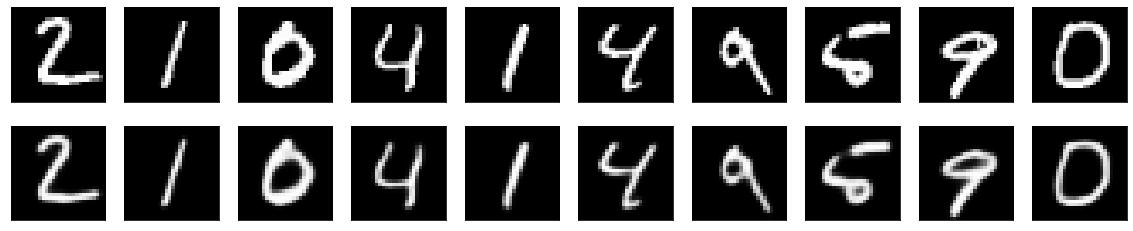

In [ ]:
# print the reconstructed images
decoded_imgs=autoencoder.predict(val_images)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(val_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

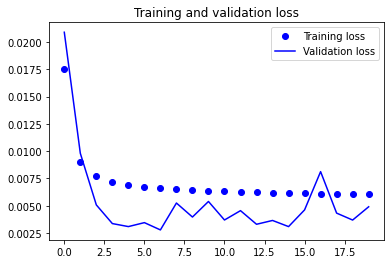

In [ ]:
# plot loss and accuracy of autoencoder
epochs=20
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# flat the encoded images and pass them to dense layers in order to built the classifier
flat=layers.Flatten()(encode)
dense1=layers.Dense(100,activation='sigmoid',kernel_initializer=initializer)(flat)
dense2=layers.Dense(10,activation='softmax',kernel_initializer=initializer)(dense1)
classifier=keras.Model(input_img,dense2)

In [ ]:
# get the autoencoder weights of the first 9 layers, meaning the encoder that is used in the classifier
for l1,l2 in zip(classifier.layers[:9],autoencoder.layers[0:9]):
    l1.set_weights(l2.get_weights())

In [ ]:
# print the weights to check they are the same
autoencoder.get_weights()[0][1]

array([[[ 0.12698002, -0.07915527,  0.0219788 ,  0.02832219,
          0.1985483 ,  0.11743511,  0.08213382,  0.05467871,
         -0.04741137, -0.27855185,  0.16058782,  0.11374797,
          0.05046139,  0.17392941, -0.02797707,  0.09319782,
          0.14735247, -0.07554495,  0.14118865, -0.2826408 ,
          0.06864838,  0.1875258 ,  0.06651152, -0.27672002,
          0.09155452, -0.10412514,  0.18588836, -0.23744279,
          0.07636791,  0.13545382, -0.06585263,  0.2398384 ]],

       [[ 0.31113312, -0.25717306,  0.06591301,  0.3195774 ,
          0.43442887,  0.03159194,  0.08679817,  0.07245733,
          0.29830235, -0.07022662,  0.3833982 , -0.2712063 ,
         -0.20791636,  0.4244229 ,  0.25781798, -0.24480194,
          0.14064904, -0.22589208,  0.03770339,  0.18754295,
          0.36386126,  0.0974168 ,  0.27863604,  0.1287877 ,
          0.06185443,  0.21451217,  0.13405314, -0.01606073,
         -0.21183813, -0.12253889, -0.29285437,  0.18572372]],

       [[ 0.175479

In [ ]:
classifier.get_weights()[0][1]

array([[[ 0.12698002, -0.07915527,  0.0219788 ,  0.02832219,
          0.1985483 ,  0.11743511,  0.08213382,  0.05467871,
         -0.04741137, -0.27855185,  0.16058782,  0.11374797,
          0.05046139,  0.17392941, -0.02797707,  0.09319782,
          0.14735247, -0.07554495,  0.14118865, -0.2826408 ,
          0.06864838,  0.1875258 ,  0.06651152, -0.27672002,
          0.09155452, -0.10412514,  0.18588836, -0.23744279,
          0.07636791,  0.13545382, -0.06585263,  0.2398384 ]],

       [[ 0.31113312, -0.25717306,  0.06591301,  0.3195774 ,
          0.43442887,  0.03159194,  0.08679817,  0.07245733,
          0.29830235, -0.07022662,  0.3833982 , -0.2712063 ,
         -0.20791636,  0.4244229 ,  0.25781798, -0.24480194,
          0.14064904, -0.22589208,  0.03770339,  0.18754295,
          0.36386126,  0.0974168 ,  0.27863604,  0.1287877 ,
          0.06185443,  0.21451217,  0.13405314, -0.01606073,
         -0.21183813, -0.12253889, -0.29285437,  0.18572372]],

       [[ 0.175479

In [ ]:
#adam=keras.optimizers.Adam(learning_rate=0.00001)
# compile the classifier 
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# before training the classifier, we choose either to train the encoder again, or train only the 2 dense layers
for layer in classifier.layers[0:9]:
    layer.trainable = False

In [ ]:
# train the classifier and store it in clas object
clas=classifier.fit(clas_images,clas_labels,epochs=10,batch_size=16,validation_data=(val_images,val_labels))

Epoch 1/10
32/32 [==============================] - 0s 11ms/step - loss: 1.4077 - accuracy: 0.6320 - val_loss: 1.0868 - val_accuracy: 0.8000
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6734 - accuracy: 0.8980 - val_loss: 0.7667 - val_accuracy: 0.8800
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3839 - accuracy: 0.9520 - val_loss: 0.5494 - val_accuracy: 0.9000
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.2381 - accuracy: 0.9700 - val_loss: 0.4386 - val_accuracy: 0.9200
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1352 - accuracy: 0.9960 - val_loss: 0.2892 - val_accuracy: 0.9500
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0832 - accuracy: 0.9960 - val_loss: 0.2751 - val_accuracy: 0.9700
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0557 - accuracy: 0.9980 - val_loss: 0.2098 - val_accuracy: 0.9700
Epoch 8/10
32/32 [=

In [ ]:
# finding the overall test loss and accuracy
score = classifier.evaluate(test_images, te_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2849 - accuracy: 0.9190
Test loss: 0.284934401512146
Test accuracy: 0.9190000295639038


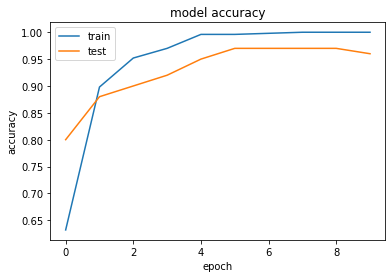

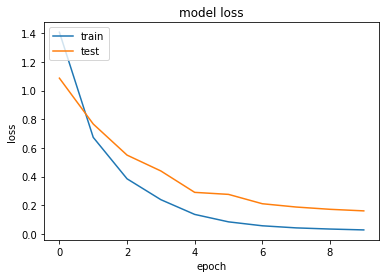

In [ ]:
# summarize history for accuracy
plt.plot(clas.history['accuracy'])
plt.plot(clas.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(clas.history['loss'])
plt.plot(clas.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
